<a href="https://colab.research.google.com/github/COGS108/group038_sp21/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#copied and pasted over from DataCheckpoint_group038.ipynb on 5/5/21 at 6:20pm
#Added in webscraping of CA legislature code on 5/6/21 at 3:00pm -Andrew



# Setup

In [ ]:
#importing basic programs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from bs4 import BeautifulSoup # Beautiful Soup library used for web scraping
import requests # this is needed to communicate with the html file

# Data Cleaning

In [ ]:
#reading in dataframes
df_vocab = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/vocab.csv')
df_codes = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/codes.csv')
df_bills = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/bills.csv')
df_shootings = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/shootings.csv')


In [ ]:
#only have 2 columns and what we have currently seems to be as usable/clean as we can make it
df_vocab.head(1)

,Word,Definition
0,Corroborate,To give support to a theory or finding


In [ ]:
#same as above
#only have 2 columns and what we have currently seems to be as usable/clean as we can make it
df_codes.head(1)

,Code,Description
0,10-35,Confidential information or open window


In [ ]:
### this is a tentative dataset while we attempt to build a webscraper to collect all of the available data
#dataset as is is pretty concise and usable
#was created by government officials with uniformity in mind so there isn't much we need to fix
df_bills.head(1)

,Measure,Session Year,Subject,Author,Status
0,AB-1,2009 - 2010,Teachers: program of professional growth: conf...,Monning,Vetoed


In [ ]:
#dropping names of victims for privacy reasons
df_shootings = df_shootings.drop(labels='name',axis=1)

#dropping columns we dont need to answer our question 
df_shootings = df_shootings.drop(labels=['latitude','longitude','is_geocoding_exact','signs_of_mental_illness','threat_level','flee','body_camera'],axis=1)


In [ ]:
#narrowing down data to only include CA
df_shootings = df_shootings[df_shootings['state']=='CA']

#converting to datetime and creating month and year columns
df_shootings.loc[:,'date'] = pd.to_datetime(df_shootings['date'])
df_shootings['month'] = df_shootings['date'].dt.month
df_shootings['year'] = df_shootings['date'].dt.year
df_shootings['day'] = df_shootings['date'].dt.day

#creating separate dataframe for maniplution-KA
shootings = df_shootings
df_shootings.head(3)

,id,date,manner_of_death,armed,age,gender,race,city,state,month,year,day
3,8,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,1,2015,4
10,19,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,1,2015,6
22,43,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,1,2015,11


In [ ]:
#dataframes of shootings sorted by year 
shootings_2015 = df_shootings[df_shootings['year']==2015]
shootings_2016 = df_shootings[df_shootings['year']==2016]
shootings_2017 = df_shootings[df_shootings['year']==2017]
shootings_2018 = df_shootings[df_shootings['year']==2018]
shootings_2019 = df_shootings[df_shootings['year']==2019]
shootings_2020 = df_shootings[df_shootings['year']==2020]
shootings_2021 = df_shootings[df_shootings['year']==2021]

#dataframes of shootings per month regardless of year
shootings_jan_all = df_shootings[df_shootings['month']==1]
shootings_feb_all = df_shootings[df_shootings['month']==2]
shootings_mar_all = df_shootings[df_shootings['month']==3]
shootings_apr_all = df_shootings[df_shootings['month']==4]
shootings_may_all = df_shootings[df_shootings['month']==5]
shootings_jun_all = df_shootings[df_shootings['month']==6]
shootings_jul_all = df_shootings[df_shootings['month']==7]
shootings_aug_all = df_shootings[df_shootings['month']==8]
shootings_sep_all = df_shootings[df_shootings['month']==9]
shootings_oct_all = df_shootings[df_shootings['month']==10]
shootings_nov_all = df_shootings[df_shootings['month']==11]
shootings_dec_all = df_shootings[df_shootings['month']==12]

In [ ]:
#to access a specific month of a specific year use: 
#variable_name = shootings_xxxx[shootings_xxxx['month' == y]] where xxxx is year as an integer and y is the month as an integer
#ex:
jan_2020 = shootings_2020[shootings_2020['month']==1]
jan_2020

,id,date,manner_of_death,armed,age,gender,race,city,state,month,year,day
4931,5342,2020-01-01,shot and Tasered,toy weapon,25.0,M,W,Grass Valley,CA,1,2020,1
4935,5350,2020-01-02,shot,gun,41.0,M,W,Murrieta,CA,1,2020,2
4952,5498,2020-01-08,shot,gun,27.0,M,NaN,Nipton,CA,1,2020,8
4958,5365,2020-01-10,shot,vehicle,24.0,M,H,Muscoy,CA,1,2020,10
4963,5367,2020-01-12,shot,toy weapon,31.0,M,H,Los Angeles,CA,1,2020,12
4980,5389,2020-01-20,shot,gun,31.0,M,H,Fountain Valley,CA,1,2020,20
4998,5428,2020-01-24,shot,gun,31.0,M,H,Oak Park,CA,1,2020,24


In [ ]:

#get separeate dataframe containing amount of shooting for every month -ka
shootings = shootings.drop(labels =['manner_of_death','armed','age', 'gender','race','city','state','month','year','day','id'] ,axis=1)
shootings = shootings.groupby([shootings['date'].dt.year,shootings['date'].dt.month]).agg({'count'})

shootings



date
          count
date date      
2015 1        9
     2        9
     3       22
     4       17
     5        8
...         ...
2020 12      10
2021 1       13
     2        7
     3       11
     4       10

[76 rows x 1 columns]

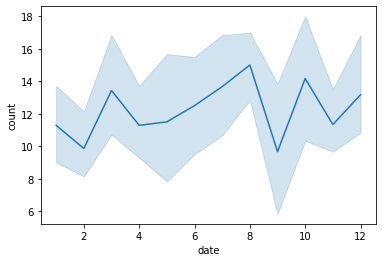

In [ ]:
#graphing the amount of shootings per month -ka for future graphs
shootings.columns = ['count']
sns.lineplot(x='date',y='count' ,data=shootings )

##Cleaning The New Bills Dataframe -Andrew [Updated 05-22-2021]
* Importing
* Trimming neccessary strings
* Removing NaNs (if needed)
* Removing Unneeded Columns
* Changing Dating to non string
* Other stuff

In [ ]:
#Writing all of the dataframes into memory to be combined into one
raw_2009_2010 = pd.read_csv("bills2009_2010.csv")
raw_2011_2012 = pd.read_csv("bills2011_2012.csv")
raw_2013_2014 = pd.read_csv("bills2013_2014.csv")
raw_2015_2016 = pd.read_csv("bills2015_2016.csv")
raw_2017_2018 = pd.read_csv("bills2017_2018.csv")
raw_2019_2020 = pd.read_csv("bills2019_2020.csv")
raw_2021_2022 = pd.read_csv("bills2021_2022.csv")

#%%

#Creating finished dataframe starting with first set of data
Full_Raw_DataFrame = raw_2009_2010.copy()
#Doing the rest of the data
df_bills = df_bills.append(raw_2011_2012)
df_bills = df_bills.append(raw_2013_2014)
df_bills = df_bills.append(raw_2015_2016)
df_bills = df_bills.append(raw_2017_2018)
df_bills = df_bills.append(raw_2019_2020)
df_bills = df_bills.append(raw_2021_2022)

df_bills = df_bills.reset_index(drop=True)


#%%

#Dropping nans due to only 2 of them existing
df_bills.dropna(subset=['status_date'], inplace = True)
df_bills.dropna(subset=['last_action_date'], inplace = True)
df_bills = df_bills.reset_index(drop=True) #Resetting index as loop uses it

index=0 #Index counter

for row in df_bills['status_date']:
    row= row.replace('-','',)
    df_bills.at[index,'status_date'] = row
#Rewrites the row under the 'Status' column so that the new string is there
    index += 1
index=0
for row in df_bills['last_action_date']:
    row= row.replace('-','',)
    df_bills.at[index,'last_action_date'] = row
#Rewrites the row under the 'Status' column so that the new string is there
    index += 1

Mounted at /content/drive


FileNotFoundError: ignored

## Cleaning and forming of words to pull bills from CA Legislature
* Using df_codes (manual, might return with ntlk to automate) and df_vocab (by code)

In [ ]:
#Took unique words from each code
final_list_of_words = ['confidential', 'squad', 'vicinity', 'identity', 'dispatching',
                     'misdemeanor', 'warrant', 'negative', 'fight', 'officer', 'duty',
                     'reckless', 'operation', 'pursuit', 'emergency', 'units', 'service',
                     'ambush', 'condition', 'patient', 'case', 'intoxicated', 'urgent',
                     'subject', 'traffic', 'complaint', 'standby', 'welfare', 'drugs',
                     'influence', 'gun', 'caution', 'auto', 'accident', 'reporting'] #Will most likely return using ntlk and removing stopwords

df_vocab = pd.read_csv('https://raw.githubusercontent.com/lupedeanda/test_repo/main/vocab.csv')
#Reloading just in case
for word in df_vocab['Word']: #Looping through each word in the column
    word = word.lower() #Making all strings lowercase
    final_list_of_words.append(word) #Adding to the final list
final_list_of_words = set(final_list_of_words) #Sorting alphabetically 

final_list_of_words

{'abscond',
 'accident',
 'adjourn',
 'admonish',
 'ambush',
 'apprehend',
 'arraign',
 'arson',
 'auto',
 'bail',
 'barricade',
 'brandish',
 'case',
 'caution',
 'collusion',
 'complaint',
 'condition',
 'confidential',
 'contusion',
 'coroner',
 'corroborate',
 'culprit',
 'custody',
 'deinquent',
 'dispatching',
 'drugs',
 'duty',
 'embezzel',
 'emergency',
 'exonerate',
 'expropriation',
 'extortion',
 'fight',
 'forgery',
 'gun',
 'identity',
 'impeach',
 'incarceration',
 'indictment',
 'influence',
 'inquest',
 'intoxicated',
 'laceration',
 'larceny',
 'libel',
 'lien',
 'litigation',
 'lynch',
 'manslaughter',
 'misdemeanor',
 'moratorium',
 'murder',
 'negative',
 'officer',
 'operation',
 'patient',
 'perjury',
 'prosecution',
 'pursuit',
 'reckless',
 'reporting',
 'reprimand',
 'reprobate',
 'sabotage',
 'sedition',
 'sequester',
 'service',
 'siege',
 'slander',
 'squad',
 'standby',
 'subdue',
 'subject',
 'suborn',
 'subpoena',
 'summons',
 'surveillance',
 'traffic',


##Removing any Non-Law Enforcement Bills
* Based off the term data we received
* Can be used with other list of terms, that is what we might change

In [ ]:
#Assuming the bills dataset remains df_bills

index=0 #Using an index to track changes by row
keepcheck = False #Used to keep or remove rows based on the content within the string
for row in df_bills['title']: #Looping by row (by title)
    row = str(row).lower() #lowercase all of the string
    rowcheck = row.split() #Splitting the string into multiple words
    for string in rowcheck: #Looping through each string in the list of strings
        string = string.replace(':','',) #Replacing : , . to empty characters
        string = string.replace('.','',)
        string = string.replace(',','',)
        for term in final_list_of_words: #Checking each term in the made vocab list
            if term == string: #Cross referencing word with term
                keepcheck=True #Keepcheck if the term is equal (if not then it'll mark the row to be dropped)

    if keepcheck == False: #If the row is still marked to be dropped
        row = '|' #False String to be removed (no other strings/rows under title use |)
        df_bills.at[index,'title'] = row #Replacing the title using the index with the new string
    keepcheck = False #Resetting the keepcheck in case it was marked as true

    index += 1

df_bills = df_bills[~df_bills['title'].isin(['|'])]
df_bills = Full_Raw_DataFrame.reset_index(drop=True) #Resetting index
df_bills.head(20)

KeyError: ignored

### Webscraping of Bills from CA Legislature (Still In Progress) [Inserted By Andrew] [Updated 05-22-2021] -NO LONGER USED
* Through the use of Beautiful Soup (with REQUESTS)
* https://leginfo.legislature.ca.gov/faces/advance/advance.xhtml
* This is the initial rough scraping process, a cleaned method will be posted below these blocks
* Finding the right table id to pull from the html and assign to a dataframe for cleaning/wrangling

In [ ]:
url = 'https://leginfo.legislature.ca.gov/faces/advance/advance.xhtml'
#Writing the url of the website to a url variable

In [ ]:
response = requests.get(url) #Getting the response from the url to see if it works out

In [ ]:
response #Response = 200 which is a success

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser') #Parsing through the html to see what is inside
#soup  
#The searches cannot be saved as individual htmls, so most likely it is saved within the search webpage and requires user input (which can most likely be simulated/inputted)

In [ ]:
tempdata = soup.find_all(class_ = 'j_idt517:bill_returned') #Subsections seems like the section that requires input of the years of bills

In [ ]:
tempdata
#No dice, looked it up and it seems like my worries were confirmed, the site requires a submitted input to return the results we want
#Researching how to scrape this rn

[]

#### Webscraping of Bills from CA Legislature Pt. II [Updated 05-22-2021] -NO LONGER USED
* Through the use of Beautiful Soup (with POST)
* https://leginfo.legislature.ca.gov/faces/advance/advance.xhtml
* This is my second attempt at scraping but through the post method, seems a lot tougher but should get us the tables we need
* Getting instructions through here: http://jonathansoma.com/lede/foundations/classes/friday%20sessions/advanced-scraping-form-submissions-completed/

In [ ]:
#Url Set
#post_params = {'allSessionYearsCheckBox': 'On', 'assemblyOriginCheckBox': 'on', 'senateOriginCheckBox': 'on', 'allSessionCheckBox': 'on', 'executeSearchBtnHidden': 'Search'} #These are the parameters that are "sent" in order to have the specific results posted
#Post parameters are inputted in as a dictionary, but they look a bit different when viewing through web inspector
#It's actually really difficult to find the exact parameters so it'll take some trial and error

post_params = {'j_idt128':'j_idt128', 'allSessionYearsCheckBox':'on', 'j_idt134:0:sessionYearsCheckBox':'on', 
               'j_idt134:1:sessionYearsCheckBox':'on', 'j_idt134:2:sessionYearsCheckBox':'on', 'j_idt134:3:sessionYearsCheckBox':'on',
               'j_idt134:4:sessionYearsCheckBox':'on', 'j_idt134:5:sessionYearsCheckBox':'on', 'j_idt134:6:sessionYearsCheckBox':'on',
                'j_idt134:7:sessionYearsCheckBox':'on', 'j_idt134:8:sessionYearsCheckBox':'on', 'j_idt134:9:sessionYearsCheckBox':'on',
                'j_idt134:10:sessionYearsCheckBox':'on', 'j_idt134:11:sessionYearsCheckBox':'on', 'assemblyOriginCheckBox':'on', 'senateOriginCheckBox':'on',
               'allSessionCheckBox':'on', 'j_idt153:0:sessionCheckBox':'on', 'j_idt153:1:sessionCheckBox':'on', 'j_idt153:2:sessionCheckBox':'on',
                'j_idt153:3:sessionCheckBox':'on', 'j_idt153:4:sessionCheckBox':'on', 'j_idt153:5:sessionCheckBox':'on', 'j_idt153:6:sessionCheckBox':'on',
                'j_idt153:7:sessionCheckBox':'on', 'j_idt153:8:sessionCheckBox':'on', 'j_idt153:9:sessionCheckBox':'on', 'executeSearchBtnHidden':'Search'}
response = requests.post(url, data=post_params) #Redoing the requests (receving and saving information after sending request) this time with the post parameters included
soup = BeautifulSoup(response.content, 'html.parser') #Creating the new "soup", html parsed using Beautiful Soup

In [ ]:
soup.prettify() #Checking results (going to be a lot of trial and error and will take me some time)

#Update 1: Geting there, seems to be missing a few more parameters causing the search to fail and results from the request to be cancelled
#Update 2: Hoping to get a meeting with David for next monday. Will keep trying this over the week/weekend

'<?xml version=\'1.0\' encoding=\'UTF-8\' ?>\n<!DOCTYPE html>\n<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">\n <head id="j_idt2">\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <!--&lt;meta http-equiv="refresh" content=";url=faces/home.xhtml"/&gt;-->\n  <link href="/resources/css/leginfo_master.css" media="screen,print" rel="stylesheet" type="text/css"/>\n  <!--&lt;link rel="stylesheet" type="text/css" href="./resources/css/leginfo_mobile.css" media="screen and (-webkit-min-device-pixel-ratio: 1.1) and (max-device-width: 990px)" /&gt;\n    &lt;link rel="stylesheet" type="text/css" href="./resources/css/leginfo_mobile.css" media="screen and (min-device-width: 481px)and (max-device-width: 640px)and (-webkit-max-device-pixel-ratio: 1)" /&gt;-->\n  <link href="/resources/css/leginfo_mobile.css" media="screen and (orientation: portrait) and (max-device-width: 767px),screen an

In [ ]:
BS_bill_data = soup.find_all(id= 'j_idt517:bill_results')
BS_bill_data

[]

In [ ]:
#Doing a bit more offline I'll import the finished one below

##Visualization Scratch Paper
* Any Visualization stuff can be in this section

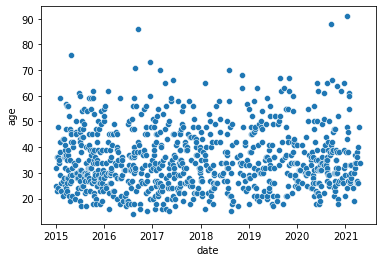

In [ ]:
#relevant data to plot
#number of shootings per year
#number of shootings per month in CA
#possible approaches 
  # sns.lmplot(x='date', y= '', data=df_shootings, fit_reg=True, height=?,aspect=?, x_jitter=?, y_jitter=?)
#sns.lineplot(x='year', y='age', data=df_shootings)
sns.scatterplot(data=df_shootings, x='date', y='age') 
  # sns.scatterplot()



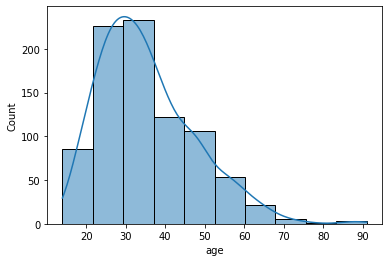

In [ ]:
sns.histplot(df_shootings['age'], bins=10, kde=True)

[Text(0.5, 1.0, 'Number of CA Shootings per Year')]

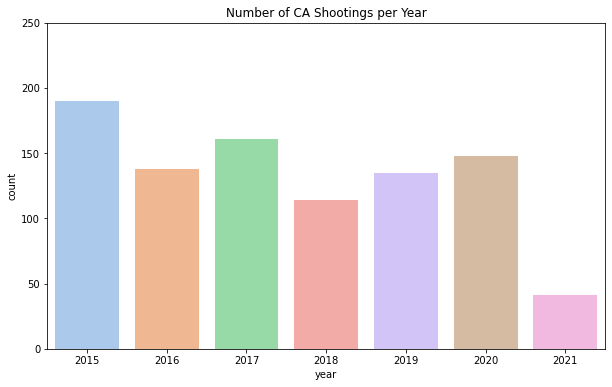

In [ ]:
#visualization for shootings in California for every year (something happend with my original graph so aI am redoing ti)-Nick
#making the plot much bigger to see
plt.figure(figsize= (10,6))
cpshooty= sns.countplot(x= df_shootings['year'], data= df_shootings, palette= 'pastel' ).set(title= 'Number of CA Shootings per Year')
#increasing the y-axis
plt.ylim(0, 250)
cpshooty

In [ ]:
#Was looking online and wanted to use a swarm plot to track how each month of recorded shootings each year ranked against each other.
#plt.figure(figsize= (10,6))
#sns.lineplot(x= df_shootings['month'], data= df_shootings, hue= df_shootings['year'] )
#one thing that I am noticing is when the graph is generated for the linke plot, the x axis is recognizing the months for their (1, 2, 3 etc. values) instead of January, Feb, March etc.
#will try to work on this and change it tommorw so df for the shootings can look better as well as the graph


In [ ]:
#first, checking to see what data type df_shootings['month'] is
monthdt= df_shootings['month'].unique()
monthdt

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

So it seems that the objects in the list are all seen as numbers. I can create a definition to take all the nubmers and replace them as strings. I can then convert those numerical strings to the actual names of the months to make the line plot make more sense.

In [ ]:
#adjusting the df shooting dataset for the months so I can change the number values to strings of the months
def num2month(num):
  #converting string to an actualstring
  string= str(num)

  #taking all of the numbered strings and replacing them with the names of the months.
  if '1' in string:
    output= 'January'
  elif '2' in string:
    output= 'February'
  elif '3' in string:
    output= 'March'
  elif '4' in string:
    output= 'April'
  elif '5' in string:
    output= 'May'
  elif '6' in string:
    output= 'June'
  elif '7' in string:
    output= 'July'
  elif '8' in string:
    output= 'August'
  elif '9' in string:
    output= 'September'
  elif '10' in string:
    output= 'October'
  elif '11' in string:
    output= 'November'
  elif '12' in string:
    output= 'December'

  return output 

In [ ]:
#applying my definition to the new 
#df_shootings['month']= df_shootings['month'].apply(num2month)
#df_shootings['month'].head

#checking the sum for one specific month
sumjan= sum(df_shootings['month']== 'January')
sumjan


0

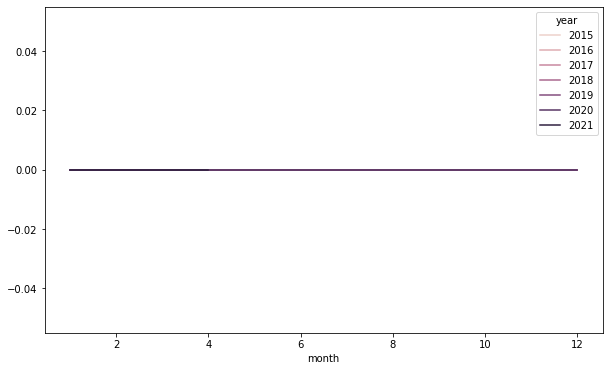

In [ ]:
#ok so it seems that I changed all the values from numbers to strings. Lets see if I can generate a line plot now
plt.figure(figsize= (10,6))
sns.lineplot(x= df_shootings['month'], y= sum(df_shootings['month']== 'January'), data= df_shootings, hue= df_shootings['year'] )

In [ ]:
#Copying df_shootings and replacing datetime with integer date (Year,Month,Day)
df_shootings_test = df_shootings.copy()

In [ ]:
df_shootings_test.dropna(subset=['date'], inplace = True)
df_shootings_test = df_shootings_test.reset_index(drop=True) #Resetting index as loop uses it

index=0 #Index counter

for row in df_shootings_test['date']:
    row = str(row).replace('-','',)
    row = row[0:8:1]
    df_shootings_test.at[index,'date'] = row
#Rewrites the row under the 'Status' column so that the new string is there
    index += 1

In [ ]:
df_shootings_test

,id,date,manner_of_death,armed,age,gender,race,city,state,month,year,day
0,8,20150104,shot,toy weapon,32.0,M,W,San Francisco,CA,1,2015,4
1,19,20150106,shot and Tasered,knife,25.0,M,W,Stockton,CA,1,2015,6
2,43,20150111,shot,gun,23.0,M,H,South Gate,CA,1,2015,11
3,63,20150115,shot,knife,36.0,M,H,Fairfield,CA,1,2015,15
4,68,20150116,shot and Tasered,knife,48.0,M,O,Fremont,CA,1,2015,16
...,...,...,...,...,...,...,...,...,...,...,...,...
922,6772,20210409,shot,tire iron,NaN,M,NaN,Whitewater,CA,4,2021,9
923,6769,20210410,shot,gun,48.0,M,NaN,San Fernando,CA,4,2021,10
924,6785,20210417,shot,gun,NaN,M,NaN,Alameda County,CA,4,2021,17
925,6793,20210421,shot,metal pole,NaN,M,NaN,Escondido,CA,4,2021,21


In [ ]:
sns.scatterplot(data=df_shootings_test, y= x='date')

ValueError: ignored